In [ ]:
## code  python script
## data  raw or processed data files
## figures  images
## notebooks  
## config  for configuration files
## logs  for backtests or experiments

In [ ]:
## create the environment   
python-m venv .venv

## activate it
.venv\Scripts\activate

##install packages installer
python -m pip install --upgrade pip

## insctall package
python -m pip install numpy pandas matplotlib

In [ ]:
##use features / topics
##  script in code/
## code/week5_01_algo_trading


In [ ]:
## config/pipeline.txt
## Data_source = local_csv
## Start_Date = 2025-01-01
## End_Date = 2026-01-01
## Raw_Path = data/raw/



In [ ]:
## Data description
## API instrction
## Method or explain of scripts
## Pipeline
## requirements document instruction

In [6]:
import numpy as np
import pandas as pd

np.random.seed(100)

##generate dates

dates=pd.date_range("2024-01-01", periods =252, freq ="B")

##generate data for 5 assets
assets = ["A" ,"B", "C" ,"D", "E"]
mu,sigma = 0.0002, 0.01
start_price = 100

prices ={}

for a in assets:
    shocks = np.random.normal(mu, sigma, size = len(dates))
    log_price = np.log(start_price) + np.cumsum(shocks)
    series = pd.Series(np.exp(log_price),index= dates)

    prices[a] = series

closes = pd.DataFrame(prices)
log_ret = ( closes / closes.shift(1)). apply(np.log).dropna()

summary = pd.DataFrame({
    "mean" : log_ret.mean(),
    "std": log_ret.std(),
    "min": log_ret.min(),
    "max": log_ret.max(),
    "count": log_ret.count(),
})

print(summary.round(6))

       mean       std       min       max  count
A -0.000300  0.010173 -0.029533  0.034852    251
B  0.000770  0.010490 -0.022853  0.033542    251
C -0.000393  0.010992 -0.031900  0.038779    251
D  0.000004  0.010030 -0.025089  0.029058    251
E  0.000792  0.009851 -0.026544  0.027450    251


In [ ]:
import numpy as np
import pandas as pd
import timeit

np.random.seed(100)

dates=pd.date_range("2024-01-01", periods =252, freq ="B")
shocks = np.random.normal(0.002,0.01, size = len(dates))
closes = pd.Series(np.exp(np.log(100) + np.cumsum(shocks)), index =dates)

log_ret = (closes / closes.shift(1)).apply(np.log).dropna()

window = 9

vol_vec = log_ret.rolling(windows).std()

vol_loop = []
idx = log_ret.index
vals = log_ret.values

for i in range(len(vals)):
    if i < window -1 :
        vol_loop.append(np.nan)
    else:
        w = vals[i-window +1: i+1]
        vol_loop.append(w.std(ddof=1))

vol_loop = pd.Series(vol_loop, index= idx)

## the loop ran slower

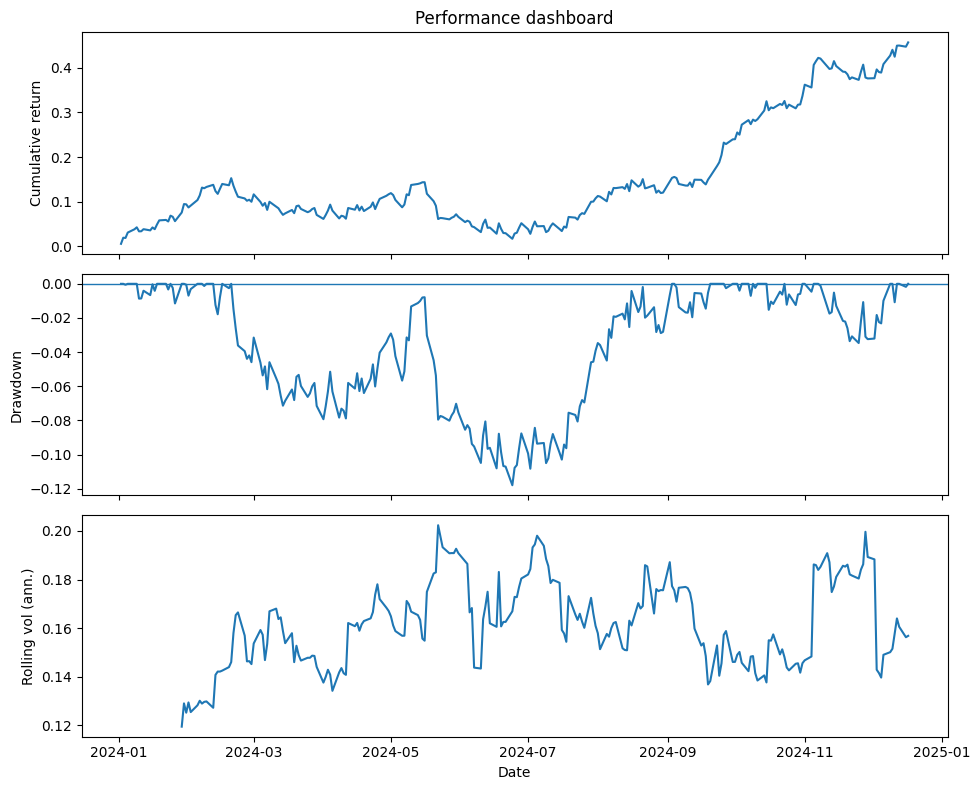

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(100)

dates=pd.date_range("2024-01-01", periods =252, freq ="B")
shocks = np.random.normal(0.002,0.01, size = len(dates))
closes = pd.Series(np.exp(np.log(100) + np.cumsum(shocks)), index =dates)

log_ret = (closes / closes.shift(1)).apply(np.log).dropna()

equity = np.exp(log_ret.cumsum())
cum_ret = equity -1


peak = equity.cummax()
drawdown = equity / peak -1

window = 20
roll_vol = log_ret.rolling(window).std() * np.sqrt(252)

#fig, axes = plt.subplots(figsize=(6.0, 3.0))
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axes[0].plot(cum_ret.index, cum_ret.values)
axes[0].set_ylabel("Cumulative return")
axes[0].set_title("Performance dashboard")

axes[1].plot(drawdown.index, drawdown.values)
axes[1].set_ylabel("Drawdown")
axes[1].axhline(0, linewidth=1)

axes[2].plot(roll_vol.index, roll_vol.values)
axes[2].set_ylabel("Rolling vol (ann.)")
axes[2].set_xlabel("Date")

plt.tight_layout()
plt.show()

##cumulative return shows overall growth but when the biggest drawdown happens, it reduces.
## when biggest drawdown shows, the volatility is high

In [10]:
import numpy as np

np.random.seed(100)

## generating dataset
n = 252
x = np.random.normal(0,0.01,size=n)
y = 0.3 * x + np.random.normal(0 ,0.01, size = n)

## calculating the relationship of Y and x
X= np.column_stack([np.ones(n),x])
alpha, beta = np.linalg.lstsq(X,y,rcond=None)[0]

alpha, beta

(np.float64(0.0005884803224432163), np.float64(0.23440732217797164))

In [11]:
import numpy as np
import pandas as pd
import torch


np.random.seed(100)
torch.manual_seed(100)

dates = pd.date_range("2024-01-01", periods=252, freq="B")
shocks = np.random.normal(0.0002, 0.01, size=len(dates))
closes = pd.Series(np.exp(np.log(100.0) + np.cumsum(shocks)), index=dates)

log_ret = (closes / closes.shift(1)).apply(np.log).dropna()  # r_t

# use lag 1
# feature: r_{t-1}, target: r_t
df = log_ret.to_frame(name="r")
df["y_next"] = df["r"].shift(-1)
df = df.dropna()  

# split the data set to train and test
split = int(0.8 * len(df))
train = df.iloc[:split]
test  = df.iloc[split:]

x = train["r"].values
y = train["y_next"].values
X = np.column_stack([np.ones(len(x)), x])         
alpha, beta = np.linalg.lstsq(X, y, rcond=None)[0]

x_test = test["r"].values
pred = alpha + beta * x_test

mse = np.mean((pred - test["y_next"].values)**2)

mse

np.float64(0.00010577652673991957)